<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2025 </h4>
    <hr>
    <h1> Homework 3: Logistic Regression</h1>
    <h3></h3>
</center>

## Description

<font face="Times New Roman">Students need to implement the Logistic Regression algorithm, and visualize the decision decision.</font>

### 1.1 Data processing

In [31]:
# Load Python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [32]:
# Load raw data
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [33]:
# Display part of raw data
# data.head(10)
print(df.head(10))  # Display the first 10 rows of DataFrame

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0 

In [34]:
X = df.drop('target', axis=1)
y = df['target']

In [35]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# obtain training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

In [37]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=1, shuffle=True)

### 1.2 Model training and prediction

In [38]:
# Build a Logistic Regression model and fit the data
model = LogisticRegression()
model.fit(X_train_pca, y_train_pca)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [39]:
# Prediction
y_pred = model.predict(X_test_pca)

### 1.3 Performance metrics

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print("分类报告：")
print(classification_report(y_test_pca, y_pred))

分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



precision：精确率，表示预测为正例的样本中真正为正例的比例。精确率越高，说明模型预测为正例的样本中，真正为正例的样本越多。

recall：召回率，表示真正为正例的样本中被预测为正例的比例。召回率越高，说明模型找出了越多的真正正例。

f1-score：F1分数，是精确率和召回率的调和平均数。F1分数越高，说明模型在精确率和召回率之间取得了更好的平衡。

support：支持数，即该类别的样本数。

## 3 Visualizing results

### 3.1 Confusion Matrix

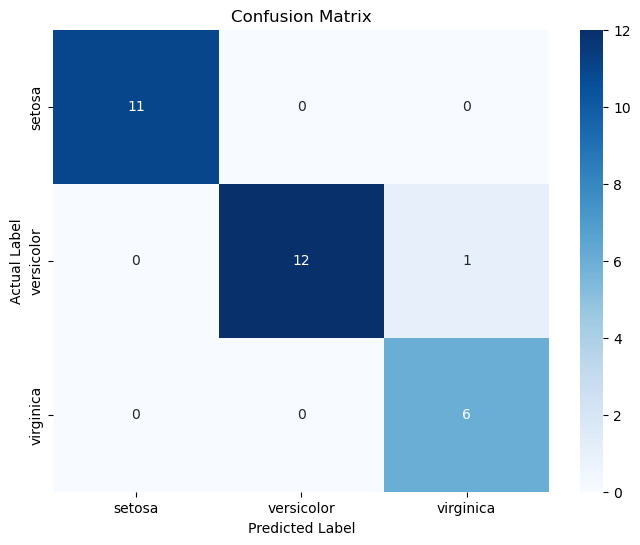

In [41]:
import seaborn as sns

# 计算混淆矩阵
cm = confusion_matrix(y_test_pca, y_pred)

cm_df = pd.DataFrame(cm, index=iris.target_names, columns=iris.target_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### 3.2 Decision boundary

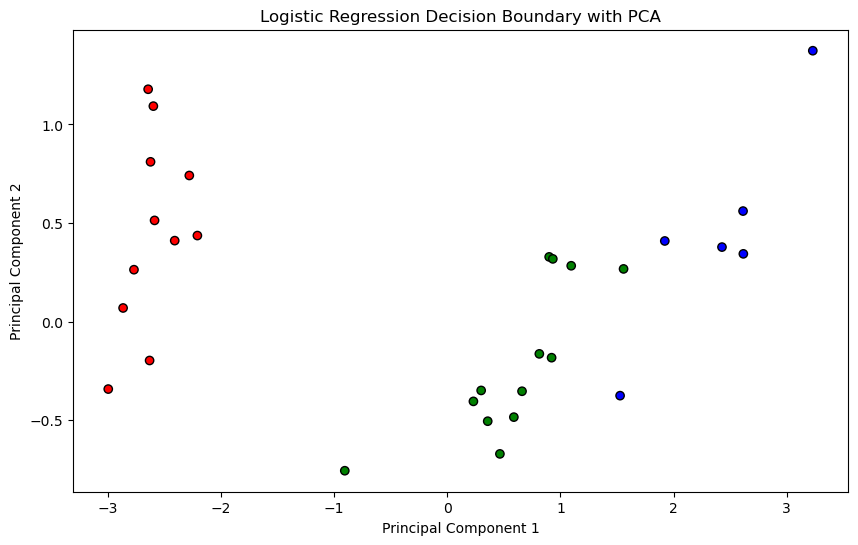

In [42]:
# Generate a mesh grid to plot the decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pca, edgecolor='k', cmap=ListedColormap(('red', 'green', 'blue')))

plt.title('Logistic Regression Decision Boundary with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

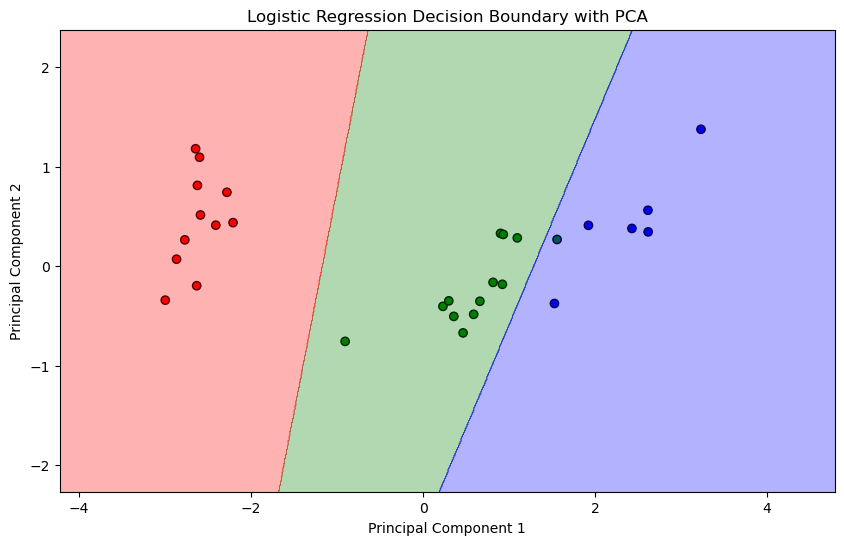

In [43]:
# Plot the decision boundary and the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pca, edgecolor='k', cmap=ListedColormap(('red', 'green', 'blue')))
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
plt.title('Logistic Regression Decision Boundary with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [44]:
print("The weight coefficients are:", model.coef_)
print("The bias coefficients are:", model.intercept_)

The weight coefficients are: [[-2.66995587  0.87701444]
 [-0.27686347  0.34151222]
 [ 2.94681934 -1.21852666]]
The bias coefficients are: [-0.48655207  2.31625427 -1.8297022 ]
